In [1]:
from importlib.resources import path
import numpy as np 
import matplotlib.pyplot as plt
import os.path as path
import wget

In [2]:
file="../../Data/manchas.dat"
url="https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionales/ManchasSolares.dat"
filtro=1900.

In [3]:
def reader(file, url):
    if not path.exists(file):
        Path_ = wget.download(url,file)
    else:
        Path_ = file
    
    df=np.loadtxt(Path_)
    return df

In [4]:
df=reader(file, url)

In [5]:
#masking

mask1=df[:,0] >= filtro

df=df[mask1]

In [6]:
#transformada
mean=np.mean(df[:,3])
Freq=df[:,3]-mean

fft=np.fft.fft(Freq)

points=len(Freq)

Frecuencias = np.fft.fftfreq(points,1)

ffta = np.abs(fft)


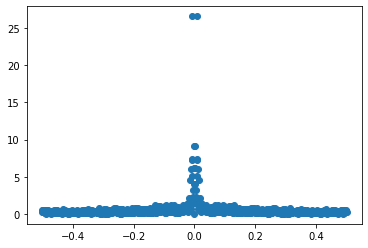

In [7]:
plt.scatter(Frecuencias,np.abs(fft/points))

In [8]:
mask2=Frecuencias <0

fft[mask2]=0 

points=len(fft)

Frecuencias = np.fft.fftfreq(points,1)

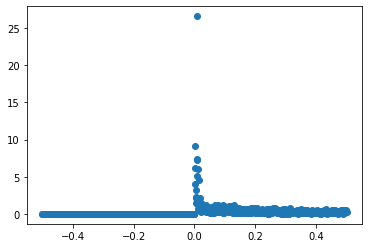

In [9]:
plt.scatter(Frecuencias,np.abs(fft/points))

In [30]:
i=np.argmax(ffta)
T=1/(Frecuencias[i]*12)

In [99]:
def FSG(T,N,Li,Ls,A=50):
    F=1/T
    x=np.linspace(Li,Ls, N)
    y=np.sin(7.5*F*x)*A
    
    return (x,y)

In [100]:
#Grafica datos
anios=df[:,0]
meses=df[:,1]/12

t=anios+meses

FreqD=df[:,3]

In [101]:
#Grafica frecuencia principal
N=len(t)

x,y=FSG(T,N,int(t[0]),int(t[N-1]))

y=y+50

mask3=FreqD >= 1/T

NewSample=FreqD[mask3]

NewSample=np.fft.ifft(2*NewSample)

tN=np.linspace(t[0],t[N-1],len(NewSample))

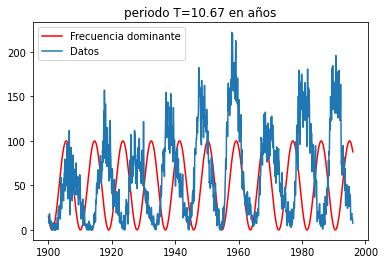

In [102]:
plt.plot(x,y,color="red",label="Frecuencia dominante")
plt.plot(t,FreqD,label="Datos")
plt.title("periodo T={:.2f} en años".format(T))
plt.legend()